In [1]:
%matplotlib ipympl
from pianoq.misc.mplc_writeup_imports import *
dir_path = r'G:\My Drive\Projects\MPLC\results\lab\2024_10_08_find_z10'

I understood I have a problem, that even though the single counts where ~2X, the coincidence counts didn't become stronger. So I thought that maybe I miscalculated the correct distance to compensate for when removing the BS. The bottom line is: when the BS cube is taken out, the image plane goes backwards (toward the source). Thus to fix this with the WFM - I want to tell it to go **forward** such that the actual image plane would be backward than that, where my detectors actually are. 

To find empirically where this is I did a large super-scan, where I scanned the single counts of two spot, for different "dzs" - movements of plane 11. I did this for both the signal and for the idler: 

Text(0.5, 0.98, 'Signal scans (Zaber, reflected)')

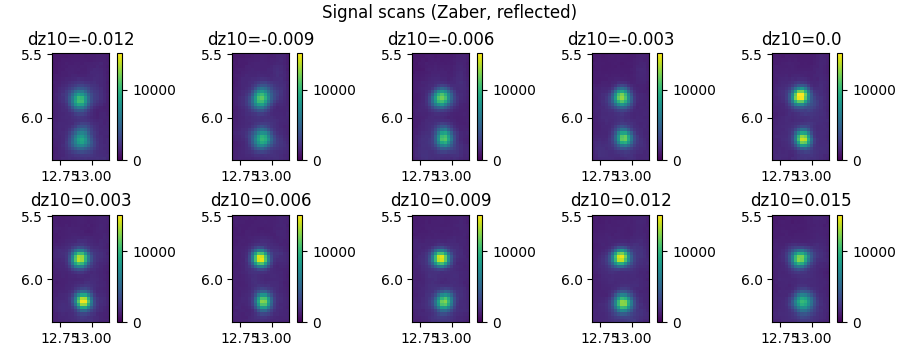

In [19]:
paths = glob.glob(rf'{dir_path}\*__dz10=*.scan')
all_ds = np.array([re.findall('.*dz10=(.*).scan', path)[0] for path in paths]).astype(float)
all_ds, paths = zip(*sorted(zip(all_ds, paths)))
all_ds, paths = all_ds[1:], paths[1:]
scans = [ScanResult(path) for path in paths]

plt.close('all')
fig, axes = plt.subplots(2, 5, figsize=(9, 3.5), constrained_layout=True)

for i in range(len(scans)):
    ax = axes.flatten()[i]
    imm = my_mesh(scans[i].X, scans[i].Y, scans[i].single2s, ax=ax, clim=[0, 15200])
    ax.set_title(fr'dz10={all_ds[i]}')
    # scans[i].show_singles(title=fr'dz10={all_ds[i]}', only=2)
    
fig.suptitle('Signal scans (Zaber, reflected)')

Text(0.5, 0.98, 'Idler scans (Thorlabs, not reflected)')

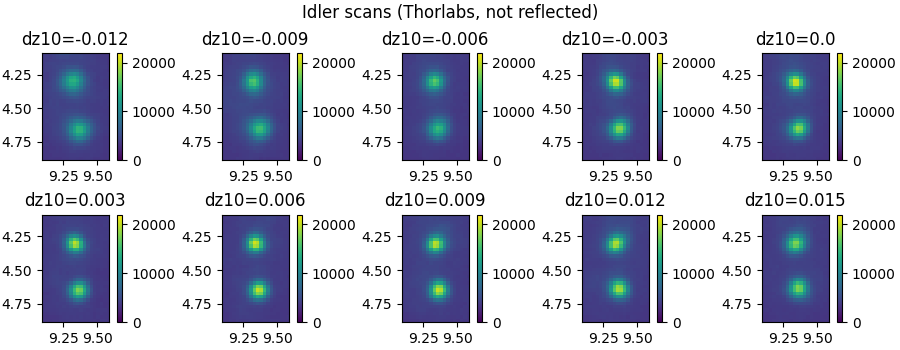

In [18]:
paths = glob.glob(rf'{dir_path}\*idler_dz10=*.scan')
all_ds = np.array([re.findall('.*dz10=(.*).scan', path)[0] for path in paths]).astype(float)
all_ds, paths = zip(*sorted(zip(all_ds, paths)))
all_ds, paths = all_ds[1:], paths[1:]
scans = [ScanResult(path) for path in paths]

plt.close('all')
fig, axes = plt.subplots(2, 5, figsize=(9, 3.5), constrained_layout=True)

for i in range(len(scans)):
    ax = axes.flatten()[i]
    imm = my_mesh(scans[i].X, scans[i].Y, scans[i].single1s, ax=ax, clim=[0, 22e3])
    ax.set_title(fr'dz10={all_ds[i]}')
    # scans[i].show_singles(title=fr'dz10={all_ds[i]}', only=2)
    
fig.suptitle('Idler scans (Thorlabs, not reflected)')

From both measurement sets it seems that the correct dz is ~6mm. To make sure I now performed the same thing aroung one spot, looking at the **coincidence counts**, which is what I really care about: 

Text(0.5, 0.98, 'Coincidences')

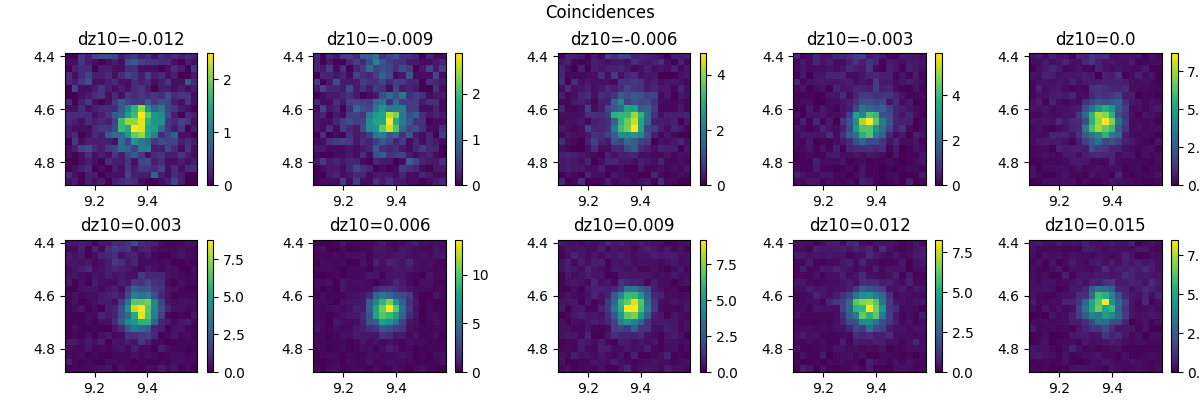

In [22]:
paths = glob.glob(rf'{dir_path}\*corrs_dz10=*.scan')
all_ds = np.array([re.findall('.*dz10=(.*).scan', path)[0] for path in paths]).astype(float)
all_ds, paths = all_ds[1:], paths[1:]
scans = [ScanResult(path) for path in paths]

fig, axes = plt.subplots(2, 5, figsize=(12, 4), constrained_layout=True)

for i in range(len(scans)):
    ax = axes.flatten()[i]
    imm = my_mesh(scans[i].X, scans[i].Y, scans[i].coincidences, ax=ax, clim=[0, None])
    # imm = my_mesh(scans[i].X, scans[i].Y, scans[i].single1s, ax=ax, clim=[0e3, 22e3])
    ax.set_title(fr'dz10={all_ds[i]}')
    # scans[i].show_singles(title=fr'dz10={all_ds[i]}', only=2)
    
fig.suptitle('Coincidences')

From which it seems that 6mm is indeed a good candidate. But before running to corr measurements, I wanted to see the full single counts, and they seem a bit crooked - which is a sign of not being in the correct plane: 

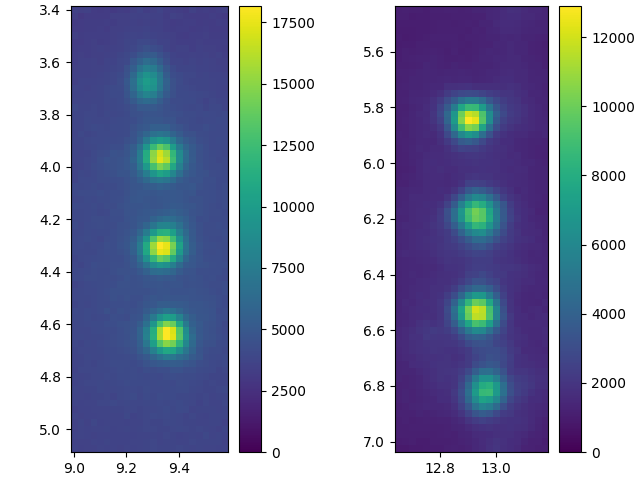

In [23]:
idl = ScanResult(r"G:\My Drive\Projects\MPLC\results\lab\2024_10_08_find_z10\finer\2024_10_09_10_26_48_idler_3_5_spots_dz=6_fine.scan")
sig = ScanResult(r"G:\My Drive\Projects\MPLC\results\lab\2024_10_08_find_z10\finer\2024_10_09_10_27_27_signal_3_5_spots_dz=6_fine.scan")

fig, axes = plt.subplots(1, 2, constrained_layout=True)
my_mesh(idl.X, idl.Y, idl.single1s, ax=axes[0], clim=[0, None])
my_mesh(sig.X, sig.Y, sig.single2s, ax=axes[1], clim=[0, None])